In [2]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [4]:
df = pd.read_csv("./final_results.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(8)
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(12)

,Name,oesch,selbstständige,remove_stopwords,lowercase,keyboard_aug,remove_num_punc,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,Large_Oesch16,oesch16,ohne,True,True,True,True,0.787000,0.95100,0.93000,...,0.95400,0.96500,0.96800,0.97200,0.97400,0.97500,0.98000,0.98100,0.98300,1.0
1,Large_Oesch16_test,oesch16,ohne,True,True,True,True,0.772303,0.95558,0.93318,...,0.93700,0.95401,0.95766,0.96528,0.96871,0.97327,0.97813,0.98498,0.98204,1.0
2,Large_Oesch8,oesch8,ohne,True,True,True,True,0.833000,0.98300,0.97100,...,0.94200,0.95800,0.96100,0.96600,0.96900,0.97300,0.97700,0.98000,0.98600,1.0
3,Large_Oesch8_test,oesch8,ohne,True,True,True,True,0.828481,0.98656,0.97499,...,0.93876,0.95598,0.96072,0.96747,0.96980,0.97250,0.97619,0.98268,0.98883,1.0
4,Small_Oesch16,oesch16,nur,True,False,True,True,0.857000,0.99700,0.98600,...,0.94500,0.95600,0.95500,0.96800,0.97200,0.97900,0.40000,0.00000,0.00000,1.0
5,Small_Oesch16_test,oesch16,nur,True,False,True,True,0.859688,0.99332,0.97105,...,0.94203,0.95714,0.95798,0.95402,0.94521,0.97778,1.00000,0.00000,0.00000,1.0
6,Small_Oesch8,oesch8,nur,False,False,True,True,0.867000,1.00000,0.99100,...,0.95800,0.97500,0.97700,0.97900,0.98300,0.98600,0.98800,0.10000,0.00000,1.0
7,Small_Oesch8_test,oesch8,nur,False,False,True,True,0.848552,1.00000,0.97773,...,0.95035,0.96512,0.96484,0.97436,0.97297,0.97549,0.97059,0.66667,0.00000,1.0


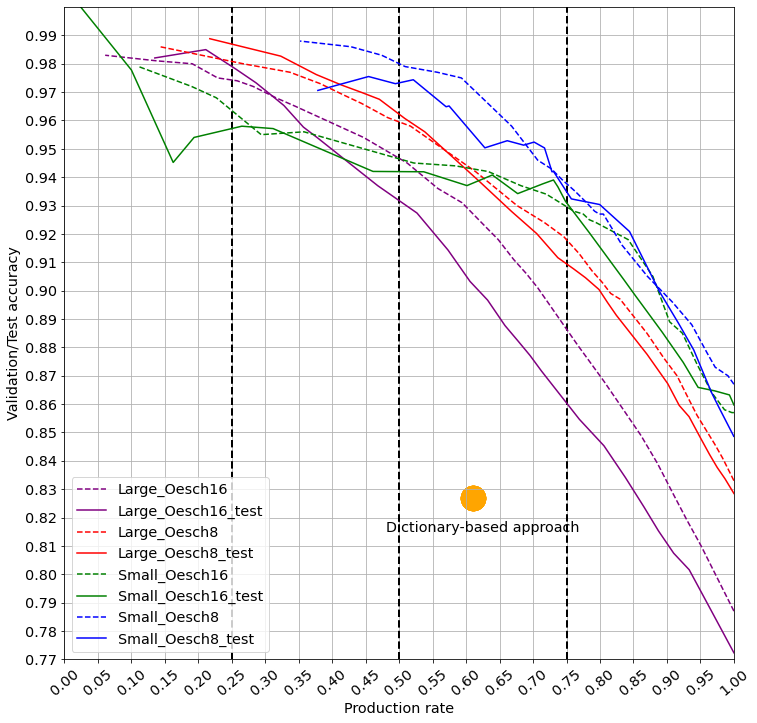

In [107]:
df = pd.read_csv("./final_results.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(8)

#df= df[df.selbstständige != "nur"]
names = df.Name.values
#combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
#colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = ["purple", "purple", "red","red", "green", "green", "blue", "blue"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

lsse = ["--","-","--","-","--","-","--","-"]

plt.figure(figsize= (12,12))
for perc, acc, name, linecolor, ls in zip(percentages, accuracies, names, colors, lsse):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=0.61, y=0.827, c="orange", marker= "o", s=600)
    plt.plot(perc, acc, c=linecolor, ls = ls, label = f"{name}")
#plt.colorbar()

plt.annotate("Dictionary-based approach", (0.61,0.827), (0.48,0.815), fontsize="x-large")
plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.77 , 1))
plt.grid()
plt.yticks(np.arange(0.77 , 1, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation/Test accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('final_result.png')

In [46]:
df = pd.read_csv("./final_results.csv",  sep = ",")
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = np.ones(8)

#df= df[df.selbstständige != "nur"]
names = df.Name.values
#combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
#colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = ["purple", "purple", "red","red", "green", "green", "blue", "blue"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, names):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

print(d.columns)
# 2 teilen für small und large dataset, und danach small und large aus name schmeißen

Index(['Small_Oesch8_test percentages', 'Small_Oesch8_test accuracies',
       'Small_Oesch8 percentages', 'Small_Oesch8 accuracies',
       'Small_Oesch16_test percentages', 'Small_Oesch16_test accuracies',
       'Small_Oesch16 percentages', 'Small_Oesch16 accuracies',
       'Large_Oesch8_test percentages', 'Large_Oesch8_test accuracies',
       'Large_Oesch8 percentages', 'Large_Oesch8 accuracies',
       'Large_Oesch16_test percentages', 'Large_Oesch16_test accuracies',
       'Large_Oesch16 percentages', 'Large_Oesch16 accuracies'],
      dtype='object')


In [49]:
e = d[['Small_Oesch8_test percentages', 'Small_Oesch8_test accuracies',
       'Small_Oesch8 percentages', 'Small_Oesch8 accuracies',
       'Small_Oesch16_test percentages', 'Small_Oesch16_test accuracies',
       'Small_Oesch16 percentages', 'Small_Oesch16 accuracies']]
e= e.rename(columns={'Small_Oesch8_test percentages': 'Oesch8 test percentages', 'Small_Oesch8_test accuracies': 'Oesch8 test accuracies',
       'Small_Oesch8 percentages': 'Oesch8 validation percentages', 'Small_Oesch8 accuracies': 'Oesch8 validation accuracies',
       'Small_Oesch16_test percentages': 'Oesch16 test percentages', 'Small_Oesch16_test accuracies': 'Oesch16 test accuracies',
       'Small_Oesch16 percentages': 'Oesch16 validation percentages', 'Small_Oesch16 accuracies':'Oesch16 validation accuracies'})
e.head(50)

,Oesch8 test percentages,Oesch8 test accuracies,Oesch8 validation percentages,Oesch8 validation accuracies,Oesch16 test percentages,Oesch16 test accuracies,Oesch16 validation percentages,Oesch16 validation accuracies
0.000,1.00000,0.848552,1.000,0.867,1.00000,0.859688,1.000,0.857
0.500,1.00000,0.848550,1.000,0.867,0.99332,0.863230,0.997,0.857
0.550,0.97773,0.858770,0.991,0.870,0.97105,0.864680,0.986,0.858
0.600,0.96659,0.864060,0.972,0.873,0.94655,0.865880,0.967,0.864
0.650,0.93987,0.879150,0.960,0.878,0.92428,0.874700,0.945,0.874
0.700,0.91759,0.888350,0.937,0.888,0.89310,0.885290,0.923,0.885
0.750,0.88864,0.899750,0.908,0.896,0.85301,0.898170,0.904,0.889
0.800,0.84410,0.920840,0.871,0.905,0.83519,0.904000,0.879,0.905
0.850,0.79955,0.930360,0.833,0.916,0.78396,0.920450,0.842,0.918
0.900,0.75724,0.932350,0.805,0.927,0.74833,0.931550,0.794,0.924


In [50]:
f = d[['Large_Oesch8_test percentages', 'Large_Oesch8_test accuracies',
       'Large_Oesch8 percentages', 'Large_Oesch8 accuracies',
       'Large_Oesch16_test percentages', 'Large_Oesch16_test accuracies',
       'Large_Oesch16 percentages', 'Large_Oesch16 accuracies']]
f= f.rename(columns={'Large_Oesch8_test percentages': 'Oesch8 test percentages', 'Large_Oesch8_test accuracies': 'Oesch8 test accuracies',
       'Large_Oesch8 percentages': 'Oesch8 validation percentages', 'Large_Oesch8 accuracies': 'Oesch8 validation accuracies',
       'Large_Oesch16_test percentages': 'Oesch16 test percentages', 'Large_Oesch16_test accuracies': 'Oesch16 test accuracies',
       'Large_Oesch16 percentages': 'Oesch16 validation percentages', 'Large_Oesch16 accuracies':'Oesch16 validation accuracies'})
f.head(50)

,Oesch8 test percentages,Oesch8 test accuracies,Oesch8 validation percentages,Oesch8 validation accuracies,Oesch16 test percentages,Oesch16 test accuracies,Oesch16 validation percentages,Oesch16 validation accuracies
0.000,1.00000,0.828481,1.000,0.833,1.00000,0.772303,1.000,0.787
0.500,0.98656,0.833710,0.983,0.841,0.95558,0.791800,0.951,0.810
0.550,0.97499,0.837670,0.971,0.846,0.93318,0.801600,0.930,0.819
0.600,0.96342,0.842310,0.958,0.851,0.91004,0.807420,0.910,0.828
0.650,0.94961,0.848270,0.945,0.856,0.88727,0.815310,0.886,0.839
0.700,0.93300,0.855570,0.932,0.862,0.86581,0.823670,0.861,0.849
0.750,0.91825,0.859550,0.915,0.870,0.83800,0.834080,0.835,0.858
0.800,0.90108,0.867230,0.896,0.876,0.80590,0.845300,0.806,0.868
0.850,0.87029,0.877550,0.870,0.885,0.76913,0.854650,0.766,0.881
0.900,0.82437,0.891330,0.830,0.897,0.71258,0.871660,0.707,0.901


In [75]:
#vorher statt None 0.0 nehmen
result = pd.DataFrame(index = names)
for min in [0.5, 0.61, 0.75, 0.9, 0.95, 1.0]:
    speicher = []
    for i in range(len(accuracies)):
        
        perce = np.flip(percentages[i])
        #print(perce)
        accu = np.flip(accuracies[i])
        #print(accu)        
        z = np.interp(min, perce, accu, left= 0.0)
        speicher.append(z)
        #print(z)
    result[min] = speicher
    #print(min)
#pprint.pprint(result)
#print(names)
result.head(10)

,0.50,0.61,0.75,0.90,0.95,1.00
Large_Oesch16,0.946662,0.927138,0.886424,0.832583,0.810429,0.787000
Large_Oesch16_test,0.931751,0.902220,0.860404,0.810899,0.794241,0.772303
Large_Oesch8,0.959500,0.942660,0.917957,0.874737,0.854077,0.833000
Large_Oesch8_test,0.962216,0.940627,0.909446,0.867592,0.848102,0.828481
Small_Oesch16,0.946476,0.942939,0.929610,0.891560,0.871727,0.857000
Small_Oesch16_test,0.941968,0.937893,0.931030,0.882946,0.865711,0.859688
Small_Oesch8,0.980029,0.971147,0.937737,0.897946,0.882348,0.867000
Small_Oesch8_test,0.973260,0.955341,0.934925,0.895277,0.873429,0.848552


In [ ]:
5358 * 77.2303 = 419157.9474
449 * 85.9688 = 38599.9912

419157.9474 + 38599.9912 = 457.757,9386
457.757,9386 / 5807 = 78,828644498019631479249182021698 Gesamt accuracy bei 100% production rate

In [77]:
def berechner(large_acc, small_acc):
    return ((5358*large_acc)+(449*small_acc))/5807

In [111]:
print("oesch16 100%",berechner(0.772303,0.859688))
print("oesch8 100%",berechner(0.828481, 0.848552 ))
print("oesch16 90%",berechner(0.810899, 0.882946))
print("oesch8 90%",berechner(0.867592, 0.895277))
print("oesch16 75%",berechner(0.860404,0.931030))
print("oesch8 75%",berechner(0.909446, 0.934925))
print("oesch16 50%",berechner(0.931751,0.941968))
print("oesch8 50%",berechner(0.962216, 0.973260))

#print("oesch16 61%",berechner(0.902220, 0.937893 ))
print("oesch16 100% validation",berechner(0.787000,0.857000))
print("oesch8 100% validation",berechner(0.833000, 0.867000 ))

oesch16 100% 0.7790596497330808
oesch8 100% 0.8300328992595144
oesch16 90% 0.8164697082831065
oesch8 90% 0.8697326173583606
oesch16 75% 0.8658648358877218
oesch8 75% 0.9114160483898743
oesch16 50% 0.9325409832960222
oesch8 50% 0.9630699273290856
oesch16 100% validation 0.7924124332701911
oesch8 100% validation 0.8356288961598072
